In [72]:
# import the libraries
import pandas as pd
import seaborn as sns 

In [73]:
%%capture
pip install pandas seaborn

In [74]:
df = sns.load_dataset("tips")

In [75]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [76]:
# missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: >

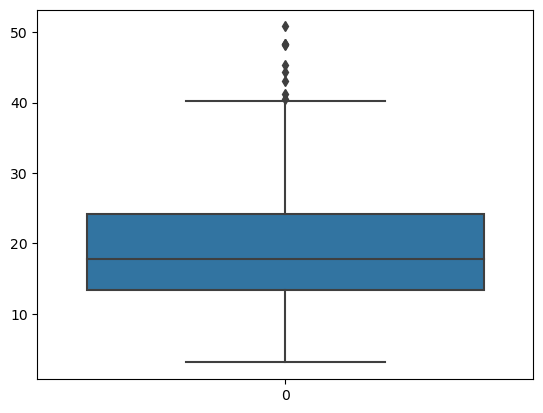

In [77]:
sns.boxplot(df["total_bill"])

In [78]:
# we are treating the outliers
# capping 
#upper_limit = q3+1.5*IQR
# lower_limit =q1-1.5*IQR
q1=df.describe()["total_bill"]["25%"]

In [79]:
q3 = df.describe()["total_bill"].loc["75%"]


In [80]:
q3 = df["total_bill"].quantile(0.75)


In [81]:
IQR = q3-q1

In [82]:
IQR

10.779999999999998

In [83]:
uppee_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [84]:
print(df.columns)


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [85]:
q1 = df["total_bill"].quantile(0.25)  # 25th percentile
q3 = df["total_bill"].quantile(0.75)  # 75th percentile
iqr = q3 - q1                          # Interquartile range
upper_limit = q3 + 1.5 * iqr           # Define the upper limit for outliers


In [86]:
lower_limit

-2.8224999999999945

In [87]:
df["total_bill"]=df["total_bill"].clip(lower_limit,upper_limit)

In [88]:
print(df.columns)


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


<Axes: >

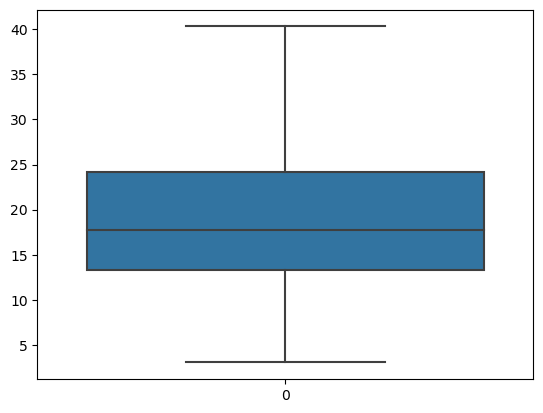

In [89]:
sns.boxplot(df["total_bill"])


In [90]:
df["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [91]:
# Encoding the datasets
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [92]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [93]:
# sex - nominal, somker - nominal - in these case also we can use map
# day - nominal or ordianl, time -naminal or ordinal
d = {"Male":0,"Famle":1}
df["sex"]=df["sex"].map(d)

In [94]:
df.isnull().sum()

total_bill     0
tip            0
sex           87
smoker         0
day            0
time           0
size           0
dtype: int64

In [95]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [96]:
d1 = {"no":0, "Yes":1}
df["smoker"]=df["smoker"].map(d1)

In [97]:
df.isnull().sum()

total_bill      0
tip             0
sex            87
smoker        151
day             0
time            0
size            0
dtype: int64

In [98]:
#day - nominal or ordinal, time - nominal or ordinal
df["day"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']>

In [99]:
d2 = {"Thur":0, "Fri":1,"Sat":2,"Sun":3}
df["day"]=df["day"].map(d2)

In [100]:
df.isnull().sum()

total_bill      0
tip             0
sex            87
smoker        151
day             0
time            0
size            0
dtype: int64

In [101]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [102]:
d4 = {"Lunch":0, "dinner":1}
df["time"]=df["time"].map(d4)

In [103]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,NaN,NaN,3,NaN,2
1,10.34,1.66,0.0,NaN,3,NaN,3
2,21.01,3.50,0.0,NaN,3,NaN,3
3,23.68,3.31,0.0,NaN,3,NaN,2
4,24.59,3.61,NaN,NaN,3,NaN,4


In [104]:
# I have to separate independent and dependent varible
X = df[["total_bill","sex","smoker","day","time","size"]]
y = df["tip"]

In [105]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,NaN,NaN,3,NaN,2
1,10.34,0.0,NaN,3,NaN,3
2,21.01,0.0,NaN,3,NaN,3
3,23.68,0.0,NaN,3,NaN,2
4,24.59,NaN,NaN,3,NaN,4


In [106]:
print(type(y))

<class 'pandas.core.series.Series'>


In [107]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [108]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [109]:
# Let's split the data into 75 % and 25 % for testing
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [136]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [164]:
# model training 
# X_train,y_train
from sklearn.linear_model import LinearRegression

lin = LinearRegression()  # Ensure this line is present and correct


In [165]:
# we use to train the model - fit
lin.fit(X_train,y_train)

LinearRegression()

In [167]:
print(X_test.isnull().sum())


total_bill     0
sex           26
smoker        34
day            0
time          45
size           0
dtype: int64


In [168]:
X_test = X_test.dropna()


In [169]:
y_test = y_test.loc[X_test.index]  # Align y_test with X_test


In [170]:
from sklearn.impute import SimpleImputer

# Use the same imputer you fitted on the training data
imputer = SimpleImputer(strategy='mean')  # or another strategy
X_test = imputer.fit_transform(X_test)


In [171]:
# Fit imputer on X_train and transform both sets
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Use transform to avoid fitting again


In [172]:
y_pred = lin.predict(X_test)


In [173]:
print(y_test.isnull().sum())


0


In [174]:
# Prediction
# X_test - will give y_pred
y_pred = lin.predict(X_test)
# later we compare y_pred with y_test using cost function- mse,rmse


In [175]:
# using mse or rmse
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)


0.9998632127803407

In [176]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


In [178]:
rmse

0.9999316040511674

In [179]:
# binary form - searlization 
import joblib 
joblib.dump(lin, "tips.pkl")

['tips.pkl']